# LAB-6

### Author

- [Navaneeth Sivakumar (21BAI1302)](https://github.com/Sivakumar-Navaneeth)

### Loading the black and white image

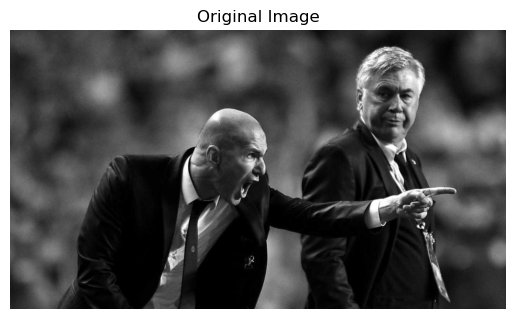

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('Data/zidane_gray.jpg' , cv2.IMREAD_GRAYSCALE)  # Read image as grayscale


plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


### Function to disply the reults with original image

In [2]:
def display_results(original, function, function_name):
    plt.figure(figsize=(10, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(function, cmap='gray')
    plt.title(function_name)

    plt.tight_layout()
    plt.show()


### Adaptive and Global Thresholding

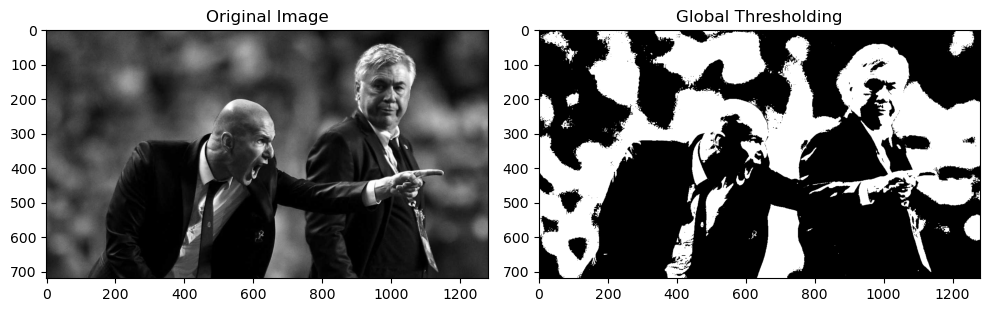

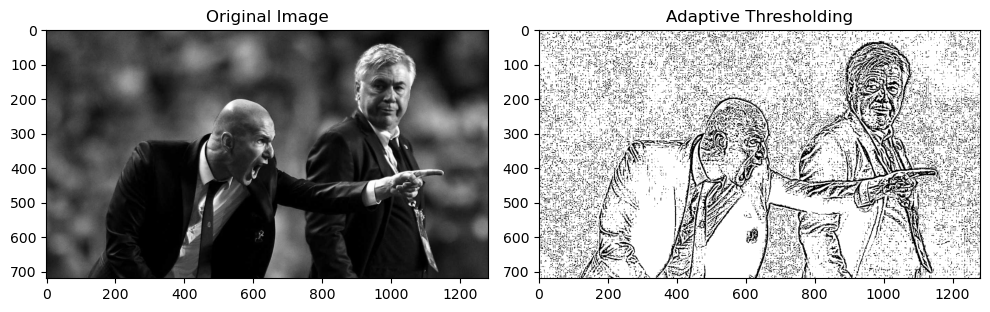

In [3]:
def thresholding(image):
    # Global Thresholding (Otsu's method)
    _, global_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Adaptive Thresholding (Gaussian)
    adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    return global_thresh, adaptive_thresh

global_thresh, adaptive_thresh = thresholding(image)

display_results(image, global_thresh, 'Global Thresholding')
display_results(image, adaptive_thresh, 'Adaptive Thresholding')

### Region Growing based on intensity similarity

#### Fix Seed Point to any pixel value

In [4]:
seed_point = (100,100)

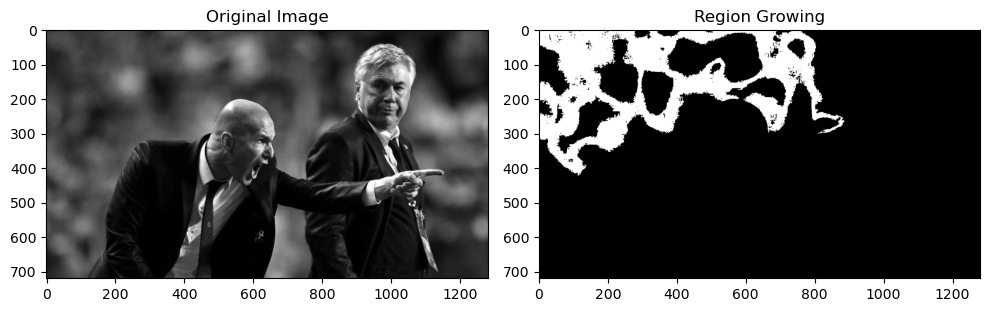

In [5]:
def region_growing(image, seed_point, threshold=15):
    rows, cols = image.shape
    segmented_image = np.zeros_like(image)
    visited = np.zeros_like(image, dtype=bool)
    
    # Initialize stack for region growing
    stack = [seed_point]
    visited[seed_point] = True
    segmented_image[seed_point] = 255
    
    seed_value = image[seed_point]

    while stack:
        x, y = stack.pop()

        # Check 4-neighbors (up, down, left, right)
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]: 
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny]:
                if abs(int(image[nx, ny]) - int(seed_value)) < threshold:
                    segmented_image[nx, ny] = 255
                    stack.append((nx, ny))
                visited[nx, ny] = True

    return segmented_image

region_grown_image = region_growing(image, seed_point)

display_results(image, region_grown_image, 'Region Growing')